# Because of Population Density virus got Spread?

To Answer this Question we need to work on different data sets lets work onit and see 

Import required python modules which are helpful to analyze the data

In [1]:
import pandas as pd
import datetime
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import numpy as np

lets read data set related to day wise cases

In [2]:
# Read Data from file
df_Day_Wise_Cases = pd.read_csv("covid_19_india.csv") 
df_Day_Wise_Cases.head()

,Sno,Date,Time,State,ConfirmedIndianNational,ConfirmedForeignNational,Cured,Deaths,Confirmed
0,1,30/01/2020,6:00 pm,Kerala,1,0,0,0,1
1,2,31/01/2020,6:00 pm,Kerala,1,0,0,0,1
2,3,01/02/2020,6:00 pm,Kerala,2,0,0,0,2
3,4,02/02/2020,6:00 pm,Kerala,3,0,0,0,3
4,5,03/02/2020,6:00 pm,Kerala,3,0,0,0,3


Data set related to state wise tesitng deails

In [3]:
# Reading data related to testing state wise
df_State_Wise_Testing = pd.read_csv("StatewiseTestingDetails.csv")  
df_State_Wise_Testing.head()

,Date,State,TotalSamples,Negative,Positive
0,17/04/2020,Andaman and Nicobar Islands,1403,1210,12.0
1,24/04/2020,Andaman and Nicobar Islands,2679,NaN,27.0
2,27/04/2020,Andaman and Nicobar Islands,2848,NaN,33.0
3,01/05/2020,Andaman and Nicobar Islands,3754,NaN,33.0
4,16/05/2020,Andaman and Nicobar Islands,6677,NaN,33.0


Data Set related to state wise population

In [4]:
# Reading data related to Population state wise
df_State_Wise_Population = pd.read_csv("population_india_census2011.csv")  
df_State_Wise_Population.head()

,S.No,State,Population,Rural_Population,Urban_Population,Area,Density,Gender_Ratio
0,1,Uttar Pradesh,199812341,155317278,44495063,"240,928 km2 (93,023 sq mi)",828.0,912
1,2,Maharashtra,112374333,61556074,50818259,"307,713 km2 (118,809 sq mi)",365.0,929
2,3,Bihar,104099452,92341436,11758016,"94,163 km2 (36,357 sq mi)",1102.0,918
3,4,West Bengal,91276115,62183113,29093002,"88,752 km2 (34,267 sq mi)",1029.0,953
4,5,Madhya Pradesh,72626809,52557404,20069405,"308,245 km2 (119,014 sq mi)",236.0,931


# Lets create one combined data set from above data sets

Lets do groupby on State related to State wise testing data set

In [5]:
df_State_Wise_Testing = df_State_Wise_Testing.groupby('State').sum() #Group by state 
df_State_Wise_Testing.head()

,TotalSamples,Positive
State,,
Andaman and Nicobar Islands,3379858,178600.0
Andhra Pradesh,298472635,3859260.0
Arunachal Pradesh,12116489,51245.0
Assam,161861746,2065991.0
Bihar,228083694,1859345.0


Above data we can see stat wise TotalSamples tested and confirmed Positve cases

Let's do group by on State related to state wise population data set

In [6]:
df_State_Wise_Population = df_State_Wise_Population.groupby('State').sum() #Group by state 
df_State_Wise_Population.head()

,S.No,Population,Rural_Population,Urban_Population,Density,Gender_Ratio
State,,,,,,
Andaman and Nicobar Islands,34,380581,237093,143488,46.0,876
Andhra Pradesh,10,49577103,34966693,14610410,303.0,993
Arunachal Pradesh,26,1383727,1066358,317369,17.0,938
Assam,15,31205576,26807034,4398542,397.0,954
Bihar,3,104099452,92341436,11758016,1102.0,918


Here we can see state wise details related to population and Density

In [7]:
df_Day_Wise_Cases = df_Day_Wise_Cases.groupby("State").sum()
df_Day_Wise_Cases.head()

,Sno,Cured,Deaths,Confirmed
State,,,,
Andaman and Nicobar Islands,712793,166515,2701,206048
Andhra Pradesh,715952,25801839,292587,32689980
Arunachal Pradesh,709460,257632,666,375408
Assam,710741,6719843,27255,8684022
Bihar,714772,8427148,51043,10083708


From above data set we can see cases state wise

Till now we did group by on state on different data sets

Now combine all these data sets to single data set

In [8]:
#Here we are using concat function with inner join
df = pd.concat([df_Day_Wise_Cases, df_State_Wise_Testing,df_State_Wise_Population],axis=1, join='inner') 
df.head()

,Sno,Cured,Deaths,Confirmed,TotalSamples,Positive,S.No,Population,Rural_Population,Urban_Population,Density,Gender_Ratio
State,,,,,,,,,,,,
Andaman and Nicobar Islands,712793,166515,2701,206048,3379858,178600.0,34,380581,237093,143488,46.0,876
Andhra Pradesh,715952,25801839,292587,32689980,298472635,3859260.0,10,49577103,34966693,14610410,303.0,993
Arunachal Pradesh,709460,257632,666,375408,12116489,51245.0,26,1383727,1066358,317369,17.0,938
Assam,710741,6719843,27255,8684022,161861746,2065991.0,15,31205576,26807034,4398542,397.0,954
Bihar,714772,8427148,51043,10083708,228083694,1859345.0,3,104099452,92341436,11758016,1102.0,918


New we have combited data set but we can see un-necessery column like Sno, S.No lets remove it

In [9]:
# To remove uncessery columns
df = df.drop(columns = ['Sno','S.No'], axis = 1) 
df.head()

,Cured,Deaths,Confirmed,TotalSamples,Positive,Population,Rural_Population,Urban_Population,Density,Gender_Ratio
State,,,,,,,,,,
Andaman and Nicobar Islands,166515,2701,206048,3379858,178600.0,380581,237093,143488,46.0,876
Andhra Pradesh,25801839,292587,32689980,298472635,3859260.0,49577103,34966693,14610410,303.0,993
Arunachal Pradesh,257632,666,375408,12116489,51245.0,1383727,1066358,317369,17.0,938
Assam,6719843,27255,8684022,161861746,2065991.0,31205576,26807034,4398542,397.0,954
Bihar,8427148,51043,10083708,228083694,1859345.0,104099452,92341436,11758016,1102.0,918


Lets Create new column called Active we can get it by using Confirmed, Cured , and Deaths values

In [10]:
df['Active'] = df['Confirmed'] - df['Cured'] - df['Deaths']
df.head()

,Cured,Deaths,Confirmed,TotalSamples,Positive,Population,Rural_Population,Urban_Population,Density,Gender_Ratio,Active
State,,,,,,,,,,,
Andaman and Nicobar Islands,166515,2701,206048,3379858,178600.0,380581,237093,143488,46.0,876,36832
Andhra Pradesh,25801839,292587,32689980,298472635,3859260.0,49577103,34966693,14610410,303.0,993,6595554
Arunachal Pradesh,257632,666,375408,12116489,51245.0,1383727,1066358,317369,17.0,938,117110
Assam,6719843,27255,8684022,161861746,2065991.0,31205576,26807034,4398542,397.0,954,1936924
Bihar,8427148,51043,10083708,228083694,1859345.0,104099452,92341436,11758016,1102.0,918,1605517


Let's create scatter plot based on above data

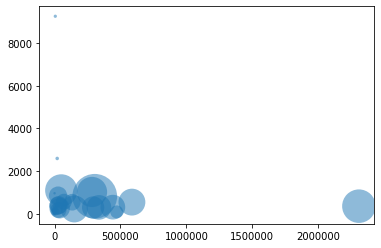

In [11]:

#Creating X axis
x = df['Deaths']  

#Creating Y axis
y = df['Density']

#Creating Buble size
s = np.abs(df.Population)/10000000  # creating for buble size

plt.scatter(x,y, cmap='Spectral', s=s*100, alpha= 0.5, edgecolors='none')

Which is not looking good all the bubles have same colour and x axis values are not good to see
lets Improve our data set more

# For each state lets assign unique colour combidation 

Based on above df(data set) lets create column called colur_dict

In [12]:
#Getting no of rows from data set
row_count = len(df.axes[0]) 

#Creating a series of values
np.random.seed(seed=row_count)
cmap=plt.cm.get_cmap('Spectral')

#Assign each colour combination for each index rows
color_dict = pd.Series({k:cmap(np.random.rand()) for k in df.index.unique()})
color_dict.name = 'color_dict'

color_dict.head()

Andaman and Nicobar Islands    (0.2800461361014994, 0.6269896193771626, 0.702...
Andhra Pradesh                 (0.9950019223375625, 0.8246059207996924, 0.499...
Arunachal Pradesh              (0.944252210688197, 0.9777008842752788, 0.6620...
Assam                          (0.2941945405613224, 0.4062283737024224, 0.680...
Bihar                          (0.5697808535178779, 0.8272202998846598, 0.644...
Name: color_dict, dtype: object

In [13]:
#Lets merger above values to data set
df = pd.merge(df, color_dict, how = 'left', left_on = df.index, right_index=True)
df.head()

,Cured,Deaths,Confirmed,TotalSamples,Positive,Population,Rural_Population,Urban_Population,Density,Gender_Ratio,Active,color_dict
State,,,,,,,,,,,,
Andaman and Nicobar Islands,166515,2701,206048,3379858,178600.0,380581,237093,143488,46.0,876,36832,"(0.2800461361014994, 0.6269896193771626, 0.702..."
Andhra Pradesh,25801839,292587,32689980,298472635,3859260.0,49577103,34966693,14610410,303.0,993,6595554,"(0.9950019223375625, 0.8246059207996924, 0.499..."
Arunachal Pradesh,257632,666,375408,12116489,51245.0,1383727,1066358,317369,17.0,938,117110,"(0.944252210688197, 0.9777008842752788, 0.6620..."
Assam,6719843,27255,8684022,161861746,2065991.0,31205576,26807034,4398542,397.0,954,1936924,"(0.2941945405613224, 0.4062283737024224, 0.680..."
Bihar,8427148,51043,10083708,228083694,1859345.0,104099452,92341436,11758016,1102.0,918,1605517,"(0.5697808535178779, 0.8272202998846598, 0.644..."


Here we can see new column called color_dict which has colour values

Lets see the plot how looks

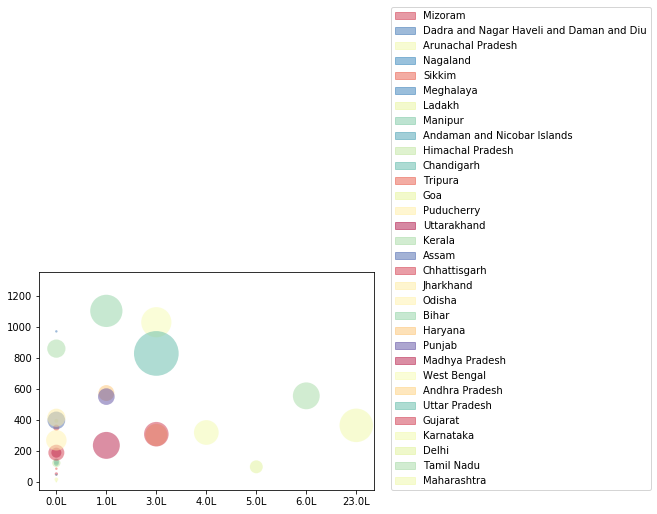

In [14]:
#Sort the values related to x axis
df = df.sort_values('Deaths')

#Creating X axis
Deaths = df['Deaths'] 

#Creating Y axis
Density = df['Density']

#Creating Buble size
Buble_Size = np.abs(df.Population)/10000000 

#Creating colour column
colour = df['color_dict']

#lets conver Deaths values to lakhs
Deaths =[ str(round(Deaths/100000))+'L' for Deaths in df['Deaths'].values ]

plt.ylim(-50,1350)

#Legend
Country_list = list(df.index)
bouble_color_list = list(df['color_dict'])
a = []
for i in range(0,len(df.index)):
    a.append(mpatches.Patch(color=bouble_color_list[i],
                          alpha = 0.5,
                          label = Country_list[i]))

plt.legend(handles=a, loc=(1.05,0))

plt.scatter(Deaths,Density, cmap='Spectral', s=Buble_Size*100, c = colour, alpha= 0.5, edgecolors='none')


Here we can see Maharastra have more deaths which compared to other stats but population wise we can see Uttar Pradesh has more population than Maharashtra

# Based on above functionality lets create one function to that we can simple pass our required values

In [15]:
#Create defination to get the scatter plot for specifed columns as x and y axis
def create_scatter_plot(df,X_Axis,Y_Axis,Colour_column,Size):
    
    '''
    INPUT
    df - pandas dataframe 
    X_Axis - X axis column name in df
    Y_Axis - Y axis column name in df
    Colour_column - colour column name in df
    Size - size of the cases i.e., Lakhs,Millions,Crores
    
    OUTPUT
    Scatter plot figure
    
    Functionality of the procedure:
    a)sort the values for x axis
    b)Assign the values for x and y
    c)Based on size conver the values to M,L,C for size of bubble
    d)create legend to the list for each colour of bubble
    e)create scatter command to create the plot
    
    '''
    
    df_sts = df.sort_values(X_Axis)  #sort values related to x-axes

    y = df_sts[Y_Axis]
    x = df_sts[X_Axis]
    
    if Size.lower() == 'millions':
        x=[ str(round(x/1000000))+'M' for x in df_sts[X_Axis].values ] #Converting the x values to perticular number
    if Size.lower() == 'lakhs':
        x=[ str(round(x/100000))+'L' for x in df_sts[X_Axis].values ] #Converting the x values to perticular number
    if Size.lower() == "crores":
        x=[ str(round(x/10000000))+'C' for x in df_sts.Confirmed.values ] #Converting the x values to perticular number
    

    c = df_sts[Colour_column]
    s = np.abs(df_sts.Population)/10000000  # creating for buble size

    plt.xlabel(X_Axis+ ' Cases')
    plt.ylabel('Population Density per sqkm')
    plt.title('State Population Density Analysis')
    plt.style.use('seaborn')

    plt.ylim(-50,1350)

    #Legend
    Country_list = list(df_sts.index)
    bouble_color_list = list(df_sts[Colour_column])
    a = []
    for i in range(0,len(df_sts.index)):
        a.append(mpatches.Patch(color=bouble_color_list[i],
                          alpha = 0.5,
                          label = Country_list[i]))

    plt.legend(handles=a, loc=(1.05,0))


    fig = plt.scatter(x,y, cmap='Spectral', s=s*100, c=c, alpha= 0.5, edgecolors='none')
    
    return fig

Lets pass the required values and see the graphs

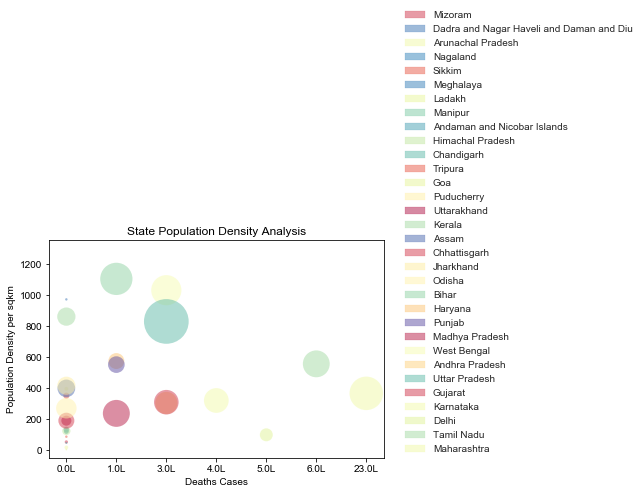

In [16]:
#Create a plot by passing Deaths as x axis, Density on Y axis 
create_scatter_plot(df,'Deaths','Density','color_dict','lakhs')

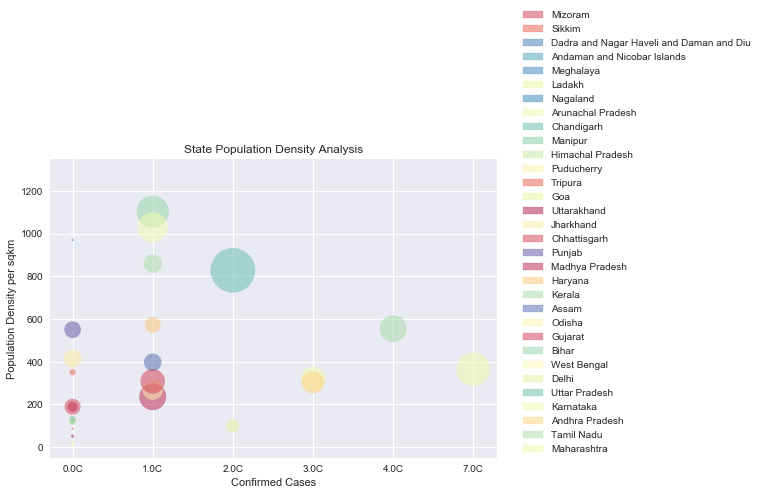

In [17]:
#Create a plot by passing Confirmed cases as x axis, Density on Y axis 
create_scatter_plot(df,'Confirmed','Density','color_dict','crores')

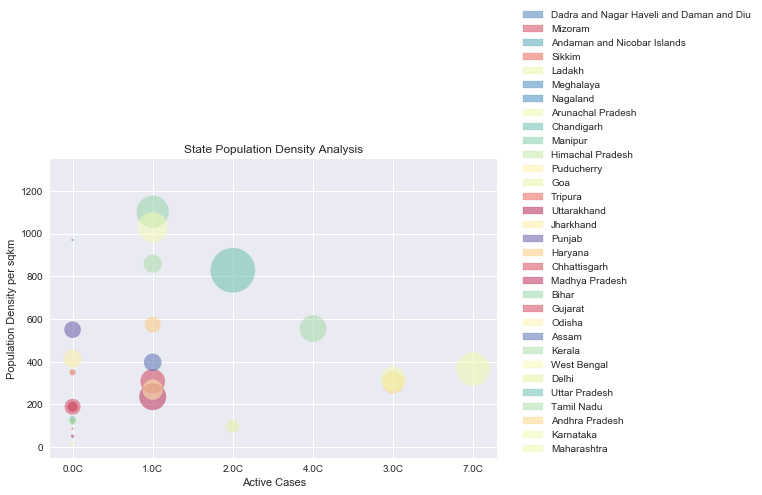

In [18]:
#Create a plot by passing Active cases as x axis, Density on Y axis 
create_scatter_plot(df,'Active','Density','color_dict','crores')

Uttar Pradesh have highest population density but not reported as many cases as Maharashtra. Although, population density is not even less than half of that of Uttar Pradesh’s. So, there seems to be so concrete relation.